In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import geopandas as gpd
import numpy as np
import cv2
import pytesseract
import torch
from torchvision import models, transforms
from PIL import Image

In [6]:
# Load Data
def load_data():
    file_path = input("Please enter the path to your CSV dataset: ")
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}")
        print(f"Dataset Columns: {data.columns}")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# 1. Bar Chart
def bar_chart(data):
    column = input("Enter the column name for bar chart (categorical): ")
    if column in data.columns:
        sns.countplot(x=column, data=data)
        plt.title(f'Distribution of {column}')
        global image
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 2. Line Chart
def line_chart(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    if x_column in data.columns and y_column in data.columns:
        plt.plot(data[x_column], data[y_column], color='blue')
        plt.title(f'{y_column} vs {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        global image
        image = plt.show()
        return image
    else:
        print(f"Columns '{x_column}' or '{y_column}' not found in the dataset.")

# 3. Pie Chart
def pie_chart(data):
    column = input("Enter the column name for pie chart (categorical): ")
    if column in data.columns:
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=data[column].unique())
        plt.title(f'{column} Distribution')
        plt.ylabel('')
        global image
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 4. Scatter Plot
def scatter_plot(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    if x_column in data.columns and y_column in data.columns:
        global image
        plt.scatter(data[x_column], data[y_column], alpha=0.5)
        plt.title(f'{y_column} vs {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        image = plt.show()
        return image
    else:
        print(f"Columns '{x_column}' or '{y_column}' not found in the dataset.")

# 5. Histogram
def histogram(data):
    column = input("Enter the column name for histogram: ")
    if column in data.columns:
        plt.hist(data[column], bins=20, color='purple', edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        global image
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 6. Heatmap
def heatmap(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    image = plt.show()
    return image

# 7. Box Plot
def box_plot(data):
    column = input("Enter the column name for box plot: ")
    if column in data.columns:
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot for {column}')
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 8. Bubble Chart
def bubble_chart(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    size_column = input("Enter the column name for bubble size: ")
    if x_column in data.columns and y_column in data.columns and size_column in data.columns:
        plt.scatter(data[x_column], data[y_column], s=data[size_column]*2, alpha=0.5)
        plt.title(f'{y_column} vs {x_column} (Bubble Size: {size_column})')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        image = plt.show()
        return image
    else:
        print(f"Columns '{x_column}', '{y_column}' or '{size_column}' not found in the dataset.")

# 9. Tree Map
def tree_map(data):
    column = input("Enter the column name for tree map (categorical): ")
    if column in data.columns:
        counts = data[column].value_counts()
        plt.figure(figsize=(10, 7))
        squarify.plot(sizes=counts, label=counts.index, color=['green', 'red'], alpha=0.7)
        plt.title(f'Tree Map of {column} Distribution')
        plt.axis('off')
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 10. Area Chart
def area_chart(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    if x_column in data.columns and y_column in data.columns:
        plt.fill_between(data[x_column], data[y_column], color='skyblue', alpha=0.4)
        plt.plot(data[x_column], data[y_column], color='blue', alpha=0.6)
        plt.title(f'{y_column} by {x_column} (Area Chart)')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        image = plt.show()
        return image
    else:
        print(f"Columns '{x_column}' or '{y_column}' not found in the dataset.")

# 11. Waterfall Chart
def waterfall_chart(data):
    column = input("Enter the column name for waterfall chart (numeric): ")
    if column in data.columns:
        fig = go.Figure(go.Waterfall(
            y=data[column],
            measure=["relative"] * len(data[column]),
            increasing={"marker": {"color": "green"}},
            decreasing={"marker": {"color": "red"}}
        ))
        fig.update_layout(title=f'Waterfall Chart for {column}')
        image = fig.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 12. Radar Chart
def radar_chart(data):
    columns = input("Enter the numeric column names for radar chart (comma-separated): ").split(',')
    if all(col in data.columns for col in columns):
        fig = go.Figure(data=go.Scatterpolar(
            r=data[columns].mean(),
            theta=columns,
            fill='toself'
        ))
        fig.update_layout(title="Radar Chart")
        image = fig.show()
        return image
    else:
        print("One or more columns not found in the dataset.")

# 13. Funnel Chart
def funnel_chart(data):
    category_column = input("Enter the categorical column name for funnel chart: ")
    value_column = input("Enter the numeric column name for funnel chart: ")
    if category_column in data.columns and value_column in data.columns:
        fig = go.Figure(go.Funnel(
            y=data[category_column],
            x=data[value_column],
            textinfo="value+percent initial"
        ))
        fig.update_layout(title="Funnel Chart")
        image = fig.show()
        return image
    else:
        print(f"Columns '{category_column}' or '{value_column}' not found in the dataset.")

# 14. Sankey Diagram
def sankey_diagram(data):
    source_column = input("Enter the source column name for Sankey diagram: ")
    target_column = input("Enter the target column name for Sankey diagram: ")
    value_column = input("Enter the value column name for Sankey diagram: ")
    if source_column in data.columns and target_column in data.columns and value_column in data.columns:
        fig = go.Figure(go.Sankey(
            node={"pad": 15, "thickness": 20, "line": {"color": "black", "width": 0.5}},
            link={"source": data[source_column], "target": data[target_column], "value": data[value_column]}
        ))
        fig.update_layout(title="Sankey Diagram")
        image = fig.show()
        return image
    else:
        print(f"Columns '{source_column}', '{target_column}' or '{value_column}' not found in the dataset.")

# 15. Gantt Chart
def gantt_chart(data):
    task_column = input("Enter the task column name for Gantt chart: ")
    start_column = input("Enter the start date column name: ")
    end_column = input("Enter the end date column name: ")
    if task_column in data.columns and start_column in data.columns and end_column in data.columns:
        fig = px.timeline(data, x_start=start_column, x_end=end_column, y=task_column)
        fig.update_layout(title="Gantt Chart")
        image = fig.show()
        return image
    else:
        print(f"Columns '{task_column}', '{start_column}' or '{end_column}' not found in the dataset.")

# 16. Violin Plot
def violin_plot(data):
    column = input("Enter the column name for violin plot (numeric): ")
    if column in data.columns:
        sns.violinplot(x=data[column])
        plt.title(f'Violin Plot for {column}')
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 17. Choropleth Map
def choropleth_map(data):
    column = input("Enter the column name for Choropleth Map (geographical info): ")
    if column in data.columns:
        # Example assumes 'country' column and plot data accordingly
        fig = px.choropleth(data, locations=column, color=column)
        fig.update_layout(title="Choropleth Map")
        image = fig.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 18. Network Graph
def network_graph(data):
    node_column = input("Enter the column name for nodes in network graph: ")
    if node_column in data.columns:
        G = nx.Graph()
        for node in data[node_column]:
            G.add_node(node)
        nx.draw(G, with_labels=True)
        plt.title("Network Graph")
        image = plt.show()
        return image
    else:
        print(f"Column '{node_column}' not found in the dataset.")

# 19. Donut Chart
def donut_chart(data):
    column = input("Enter the column name for donut chart (categorical): ")
    if column in data.columns:
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=data[column].unique())
        plt.gca().set_aspect('equal')  
        plt.title(f'{column} Distribution (Donut Chart)')
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

# 20. Polar Chart
def polar_chart(data):
    column = input("Enter the column name for polar chart (numeric): ")
    if column in data.columns:
        angles = np.linspace(0, 2 * np.pi, len(data[column]), endpoint=False)
        plt.subplot(111, polar=True)
        plt.plot(angles, data[column], linewidth=2, linestyle='solid')
        plt.title(f'{column} Polar Chart')
        image = plt.show()
        return image
    else:
        print(f"Column '{column}' not found in the dataset.")

Please enter the path to your CSV dataset: /Users/varsharani/Downloads/diabetes-data.csv
Dataset loaded successfully from /Users/varsharani/Downloads/diabetes-data.csv
Dataset Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Choose the type of graph you want to visualize:
1. Bar Chart
2. Line Chart
3. Pie Chart
4. Scatter Plot
5. Histogram
6. Heatmap
7. Box Plot
8. Bubble Chart
9. Tree Map
10. Area Chart
11. Waterfall Chart
12. Radar Chart
13. Funnel Chart
14. Sankey Diagram
15. Gantt Chart
16. Violin Plot
17. Choropleth Map
18. Network Graph
19. Donut Chart
20. Polar Chart
Enter the number of the graph: 6


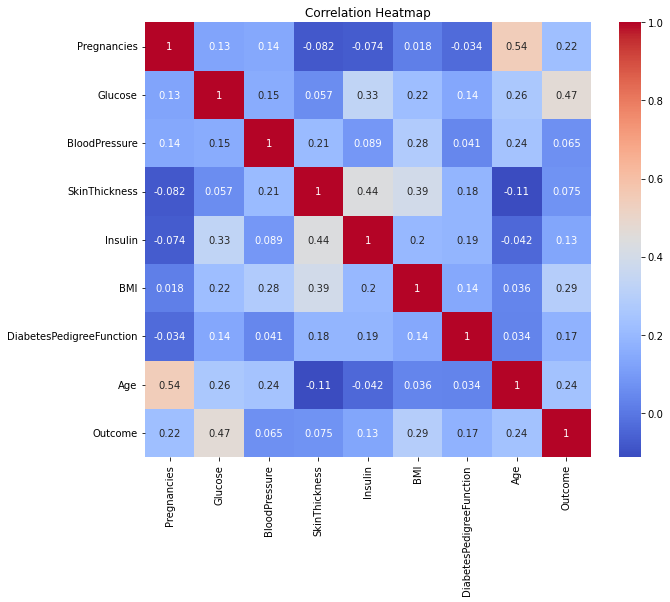

In [11]:


# Main Execution
if __name__ == "__main__":
    # Load the dataset by prompting the user
    data = load_data()
    
    if data is None:
        print("Dataset loading failed. Exiting the program.")
    else:
        # Prompt user for which graph they want to view
        print("Choose the type of graph you want to visualize:")
        print("1. Bar Chart")
        print("2. Line Chart")
        print("3. Pie Chart")
        print("4. Scatter Plot")
        print("5. Histogram")
        print("6. Heatmap")
        print("7. Box Plot")
        print("8. Bubble Chart")
        print("9. Tree Map")
        print("10. Area Chart")
        print("11. Waterfall Chart")
        print("12. Radar Chart")
        print("13. Funnel Chart")
        print("14. Sankey Diagram")
        print("15. Gantt Chart")
        print("16. Violin Plot")
        print("17. Choropleth Map")
        print("18. Network Graph")
        print("19. Donut Chart")
        print("20. Polar Chart")
        
        choice = int(input("Enter the number of the graph: "))
        
        # Call the appropriate function based on user input
        if choice == 1:
            bar_chart(data)
        elif choice == 2:
            line_chart(data)
        elif choice == 3:
            pie_chart(data)
        elif choice == 4:
            scatter_plot(data)
        elif choice == 5:
            histogram(data)
        elif choice == 6:
            heatmap(data)
        elif choice == 7:
            box_plot(data)
        elif choice == 8:
            bubble_chart(data)
        elif choice == 9:
            tree_map(data)
        elif choice == 10:
            area_chart(data)
        elif choice == 11:
            waterfall_chart(data)
        elif choice == 12:
            radar_chart(data)
        elif choice == 13:
            funnel_chart(data)
        elif choice == 14:
            sankey_diagram(data)
        elif choice == 15:
            gantt_chart(data)
        elif choice == 16:
            violin_plot(data)
        elif choice == 17:
            choropleth_map(data)
        elif choice == 18:
            network_graph(data)
        elif choice == 19:
            donut_chart(data)
        elif choice == 20:
            polar_chart(data)
        else:
            print("Invalid choice, please enter a number between 1 and 20.")

/Users/varsharani/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/varsharani/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/varsharani/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:05<00:00, 18.5MB/s]


Extracted Text from Graph:
Correlation Heatmap
1»
oo
igot @ € # g€ 8 E
ee ee: i i


Sample Insights:
- Feature vector shape: torch.Size([1, 1000])
- Possible trend detected: Increasing sales (hypothetical)
- Anomaly detected: Low sales in Q3 (hypothetical)


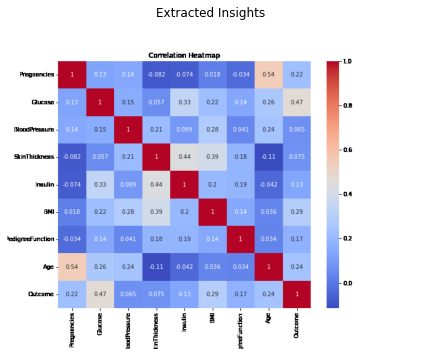

In [10]:


# Path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = "/opt/homebrew/bin/tesseract" # Update this for your system

# Preprocessing the graph image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary

# Extracting text using OCR
def extract_text(image):
    text = pytesseract.image_to_string(image, config="--psm 6")
    return text

# Feature extraction using pre-trained ResNet
def extract_features(image_path):
    # Load pre-trained ResNet model
    model = models.resnet50(pretrained=True)
    model.eval()
    
    # Image transformations for the model
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0)
    
    # Extract features
    with torch.no_grad():
        features = model(input_tensor)
    return features

# Displaying insights
def visualize_insights(image_path, text, features):
    # Display the image
    plt.figure(figsize=(10, 6))
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Extracted Insights")
    
    # Display extracted text and dummy insights
    print("Extracted Text from Graph:")
    print(text)
    
    print("\nSample Insights:")
    print("- Feature vector shape:", features.shape)
    print("- Possible trend detected: Increasing sales (hypothetical)")
    print("- Anomaly detected: Low sales in Q3 (hypothetical)")
    plt.show()

# Main function
def main():
    image_path = "/Users/varsharani/Downloads/heatmap.png" # Replace with your graph image path
    processed_image = preprocess_image(image_path)
    text = extract_text(processed_image)
    features = extract_features(image_path)
    visualize_insights(image_path, text, features)

if __name__ == "__main__":
    main()
